# Experiment 1: Classify valence using captions

The goal of this experiment is to evaluate the caption feature usefulness in classification.

**Baseline model**: Vader system

As a baseline model, Vader system will be used to see how good it is in classifying the valence: negative,neutral or positive.


## VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

https://github.com/cjhutto/vaderSentiment

http://www.benedekkurdi.com/#oasis


The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).

Compound score is a 'normalized, weighted composite score' is accurate.

VADER system classify given text into 3 categores:
    - positive : compound score >=  0.05
    - neutral  : -0.05 < compound score < 0.05
    - negative : compound score <= -0.05

## Install VADER package

In [1]:
!pip install vaderSentiment
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.data.path.append('~/nltk_data')

from utils.scoring_utils import *
from utils.data_utils import *
from utils.plotting_utils import *
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(width=41, compact=True)

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/elkhand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
None


## Sample Image captions of OASIS dataset

In [2]:
image_captions=["the women are proudly walking in a parade.",
               "instruments of torture in the room and on the walls can inflict pain and suffering.",
               "people being subjugated is not pleasant.",
               "roller coasters are fun.",
               "ape in confinement is looking apprehensive, confining wild animals is bad.",
               "roller coaster tracks disappearing into the snow hint at excitement.",
               "the men look like they are happy with each other and ready to embrace.",
               "A dirty American flag and white shoe, lying in broken wood with plants growing through it.",
               "Two sled dogs in harness, running across a snowy field.",
               "A brown dog sitting on a garden path.  His mouth is open and his mottled tongue is hanging out. He has a chain collar around his neck.",
               "A brown and white beagle wearing a black collar, sitting with its mouth open.",
               "A short-haired brown dog and a guinea pig, lying side by side on a red couch.",
               "A dog on a leash with its mouth open, looking alertly towards the camera.",
               "An enormous mushroom cloud rises from Bikini Atoll.",
               ]
print("Total sample captions",len(image_captions))

Total sample captions 14


## Evaluate valence scores of sample captions via VADER

In [3]:
print_polarity_scores(image_captions)

the women are proudly walking in a parade. 
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.5574} POSITIVE

instruments of torture in the room and on the walls can inflict pain and suffering. 
 {'neg': 0.462, 'neu': 0.538, 'pos': 0.0, 'compound': -0.8834} NEGATIVE

people being subjugated is not pleasant. 
 {'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'compound': -0.4023} NEGATIVE

roller coasters are fun. 
 {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106} POSITIVE

ape in confinement is looking apprehensive, confining wild animals is bad. 
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.5423} NEGATIVE

roller coaster tracks disappearing into the snow hint at excitement. 
 {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.4939} POSITIVE

the men look like they are happy with each other and ready to embrace. 
 {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.875} POSITIVE

A dirty American flag and white shoe, lying in broken wood with plants growing 

{'A brown and white beagle wearing a black collar, sitting with its mouth open.': 0,
 'A brown dog sitting on a garden path.  His mouth is open and his mottled tongue is hanging out. He has a chain collar around his neck.': 0,
 'A dirty American flag and white shoe, lying in broken wood with plants growing through it.': -1,
 'A dog on a leash with its mouth open, looking alertly towards the camera.': 0,
 'A short-haired brown dog and a guinea pig, lying side by side on a red couch.': -1,
 'An enormous mushroom cloud rises from Bikini Atoll.': 0,
 'Two sled dogs in harness, running across a snowy field.': 0,
 'ape in confinement is looking apprehensive, confining wild animals is bad.': -1,
 'instruments of torture in the room and on the walls can inflict pain and suffering.': -1,
 'people being subjugated is not pleasant.': -1,
 'roller coaster tracks disappearing into the snow hint at excitement.': 1,
 'roller coasters are fun.': 1,
 'the men look like they are happy with each other an

## TODO:
- read all captions from captions.csv file
- read all valence score from OASIS.csv file
- run all captions in OASIS dataset into VADER system and compare the valences score from OASIS.csv with compound scores from VADER
- print accuracy of the VADER system vs human rating

## Read Image Valence scores and label them

Valence scores are obtained from OASIS.csv file from the dataset providers, whoobtained valencescores by Mechanical Turkers.

Range boundaries:
- positive : compound score >  4.0
- neutral  : 2.0 < compound score < 4.0
- negative : compound score < 2.0

Stats of valence scores
-------------------------------- 
minValence 1.1078431372548998 
maxValence 6.49019607843137 
meanValence 4.331249062270062 
stdValence 1.226900650376635 
medianValence 4.5196078431372495 
--------------------------------

Histogram of positive, negative and neutral images in OASIS {1: 593, 0: 270, -1: 37}
Total images 900
labelToCount {1: 593, 0: 270, -1: 37}


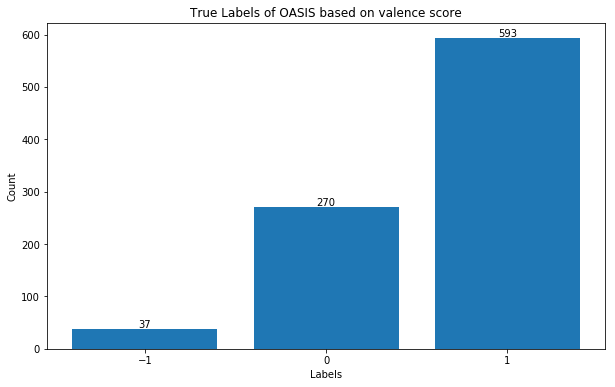

In [4]:
from utils.scoring_utils import *
from utils.data_utils import *
from utils.plotting_utils import *

oasis_csv_path = "dataset/metadata/OASIS.csv"
imageIdToLabel = {}
imageIdToValence = get_image_id_to_valence_mean(oasis_csv_path)

#imageIdToValenceNormalized = get_normalized_valence_mean(imageIdToValence)


valence_values = list(imageIdToValence.values())

minValence = min(valence_values)
maxValence = max(valence_values)
meanValence = np.mean(valence_values)
medianValence = np.median(valence_values)
stdValence = np.std(valence_values)
print("Stats of valence scores\n--------------------------------","\nminValence", minValence,
      "\nmaxValence",maxValence, "\nmeanValence",meanValence,
      "\nstdValence", stdValence,"\nmedianValence",medianValence,"\n--------------------------------\n")

labelToCount = {}
isStrResult = False
neutralLow=2.0
neutralHigh=4.0
for imageId in imageIdToValence:
    valenceScore = imageIdToValence[imageId]
    label = evaluate_score(valenceScore, isStrResult, neutralLow, neutralHigh)
    imageIdToLabel[imageId] = label
    if label not in labelToCount:
        labelToCount[label] = 0
    labelToCount[label] += 1

print("Histogram of positive, negative and neutral images in OASIS",labelToCount)    
print("Total images",len(imageIdToValence.keys()))
title = 'True Labels of OASIS based on valence score'
plot_histogram(labelToCount, title)
#read_oasis_csv_into_dataframe(oasis_csv_path).head()

# Human generated Captions evaluation

F1 is more useful than accuracy, especially in this case when we have an uneven class distribution.

- Read captions.csv
- Evaluate each caption with VADER
- Check accuracy and F1 score of VADER by comparing with true labels

Total skipped images 0
Total captions:  900
labelToCount {-1: 212, 0: 489, 1: 199}


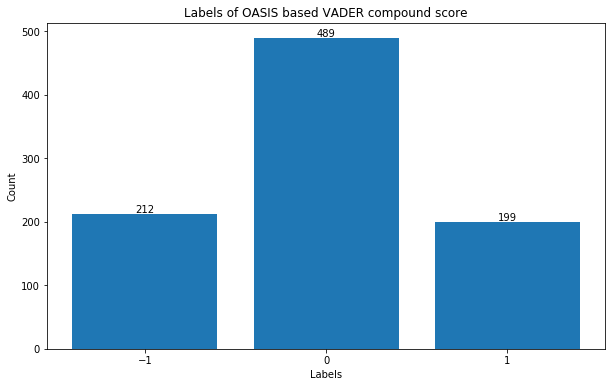

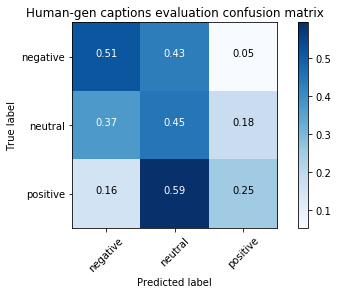

Accuracy and F1 score per each class 
---------------------------------------
{'f1_score_neg': 0.15261044176706826,
 'f1_score_neut': 0.3188405797101449,
 'f1_score_pos': 0.3762626262626262,
 'neg_accuracy': 8.962264150943396,
 'neutral_accuracy': 57.075471698113205,
 'pos_accuracy': 74.87437185929649,
 'total_accuracy': 32.111111111111114}


In [5]:
captions_csv_path = "dataset/metadata/captions.csv"
imageIdToCaption = get_image_id_to_caption(captions_csv_path)
#print(imageIdToCaption.keys())

imageIdToLabelFromCaptions = label_image_captions(imageIdToCaption)
print("Total captions: ",len(imageIdToLabelFromCaptions.keys()))
labelToCountFromCaptions = get_label_count(imageIdToLabelFromCaptions)
title = 'Labels of OASIS based VADER compound score'
plot_histogram(labelToCountFromCaptions, title)
titleOfConfusionMatrix = "Human-gen captions evaluation confusion matrix"
accuracyDict = get_accuracy(imageIdToLabel, imageIdToLabelFromCaptions, titleOfConfusionMatrix)
print("Accuracy and F1 score per each class","\n---------------------------------------")
pp.pprint(accuracyDict)

# Auto-generated evaluation

## Show and Tell: A Neural Image Caption Generator


A TensorFlow implementation of the image-to-text model described in the paper [1] was used to auto-generate captions for OASIS image dataset.

The Show and Tell model is an example of an encoder-decoder neural network. It works by first "encoding" an image into a fixed-length vector representation, and then "decoding" the representation into a natural language description.

The image encoder is a deep convolutional neural network. Choice of network is the Inception v3 [2] image recognition model pretrained on the ImageNet Large Scale Visual Recognition Challenge (ILSVRC-2012-CLS) [3] image classification dataset.

The decoder is a long short-term memory (LSTM) network. This type of network is commonly used for sequence modeling tasks such as language modeling and machine translation. In the Show and Tell model, the LSTM network is trained as a language model conditioned on the image encoding.

<img src="show_and_tell_architecture.png" style="width: 500px;">

[1] "Show and Tell: Lessons learned from the 2015 MSCOCO Image Captioning Challenge.", Oriol Vinyals, Alexander Toshev, Samy Bengio, Dumitru Erhan.

[2] "Rethinking the Inception Architecture for Computer Vision", Christian Szegedy, Vincent Vanhoucke, Sergey Ioffe, Jonathon Shlens, Zbigniew Wojna
http://arxiv.org/abs/1512.00567

[3] http://www.image-net.org/challenges/LSVRC/2012/

im2txt Code: https://github.com/tensorflow/models/tree/master/research/im2txt 

##  Sample Auto-generated captions


| id | image_file   | auto-gen caption| human caption|valence_mean|image|
|------|------|------|------|------|------|
|I446  | Jail 5.jpg| a train traveling through a lush green forest | Two rows of barbed wire fencing surrounding a prisoner barracks. | 3.06862745098039 |<img src="dataset/images/Jail 5.jpg">|
|I434  | Horse 1.jpg| a couple of brown horses standing next to each other | "Two nuzzling horses, one with a white and brown head and brown mane, the other with a brown head and blonde main, in a grassy field."| 5.93518518518519 |<img src="dataset/images/Horse 1.jpg">|
|I813  | Sunset 4.jpg| a boat floating on a silver next to a forest | "A body of water in front of some mountains, with a sunset in the sky above reflecting onto the water." | 6.1078431372549 |<img src="dataset/images/Sunset 4.jpg">|
|I183  | Couple 1.jpg| a man holding a nintendo wii game controller| A man and a woman kissing with the glare of the sun obscuring their faces. | 5.53921568627451 |<img src="dataset/images/Couple 1.jpg">|
|I326  | Fire 9.jpg | a fire hydrant sitting in the middle of a forest | A car engulfed in flames with thick black smoke rising from it.| 1.47058823529412 |<img src="dataset/images/Fire 9.jpg">|


## Clean and transform auto-generated captions to be in the same format as captions.csv
This task will make auto-generated captions to be in the format of

(imageId, image title, caption)

In [6]:
oasis_csv_path = "dataset/metadata/OASIS.csv"
auto_generated_caption_input_path = "dataset/metadata/auto_generated_captions.txt"
auto_generated_caption_output_path = "dataset/metadata/auto_generated_captions.csv"
clean_auto_generated_captions(auto_generated_caption_input_path, auto_generated_caption_output_path, oasis_csv_path)

## Evaluate Auto Generated captions accuracy using VADER system

Total skipped images 0
Total Auto generated captions:  899
labelToCount {0: 652, 1: 205, -1: 42}


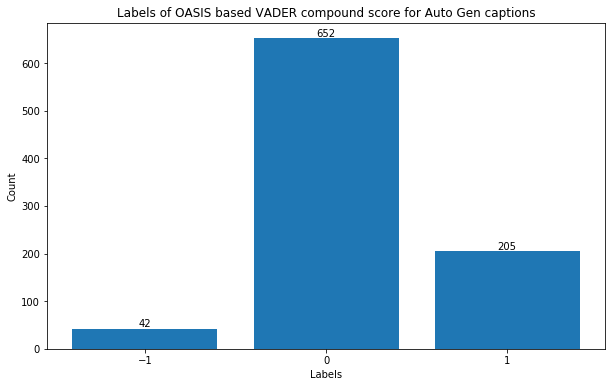

KeyError: 'I502'

In [7]:
auto_generated_captions_path = "dataset/metadata/auto_generated_captions.csv"
# Auto generated captions include comma, thus using '|' as delimeter
delimeter="|"
imageIdToAutoGenCaption = get_image_id_to_caption(auto_generated_captions_path, delimeter)
#print(imageIdToCaption)

imageIdToLabelFromAutoGenCaptions = label_image_captions(imageIdToAutoGenCaption)
print("Total Auto generated captions: ",len(imageIdToLabelFromAutoGenCaptions.keys()))
labelToCountFromAutoGenCaptions = get_label_count(imageIdToLabelFromAutoGenCaptions)
title = 'Labels of OASIS based VADER compound score for Auto Gen captions'
plot_histogram(labelToCountFromAutoGenCaptions, title)
titleOfConfusionMatrix = "Auto-gen captions evaluation confusion matrix"
accuracyDictAutoGenCaptions = get_accuracy(imageIdToLabel, imageIdToLabelFromAutoGenCaptions, titleOfConfusionMatrix)
print("Accuracy and F1 score per each class","\n---------------------------------------")
pp.pprint(accuracyDictAutoGenCaptions)

## Caption stats

In [ ]:
humanCaptions = imageIdToCaption.values()
autoGeneratedCaptions = imageIdToAutoGenCaption.values()
humanCaptionsAvgNumberOfWords = calcualte_mean_caption_length(humanCaptions)
autoGeneratedCaptionsAvgNumberOfWords = calcualte_mean_caption_length(autoGeneratedCaptions)
print("Human captions avg word length", humanCaptionsAvgNumberOfWords)
print("Auto-generated captions avg word length", autoGeneratedCaptionsAvgNumberOfWords)

## Conclusion of the experiment

- True labels were derived based on human valence scores. 
 - labelToCount {-1: 37, 0: 270, 1: 593} based on valence_mean scores
 - Negative (-1): valence_mean <= 2
 - Neutral  (0) :    2 < valence_mean < 4
 - Positive (1) :   4 <= valence_mean

- Accuracy of VADER on **human captions** is 32.11%
 - labelToCount {-1: 212, 0: 489, 1: 199}
- Accuracy of VADER on **auto-generated captions** is 37.44% 
 - labelToCount {-1: 42, 0: 652, 1: 206}
 
 ### Conclusive results of evaluation of human/auto-generated captions using VADER system 
 - Based on valence scores, 593 images were labeled as positive, wheres based on captions, both human and auto-generated captions, we can see most images are labeled as neutral. This concludes our experiments that image (pixels) will contribute to classification decision of emotion more than the captions.
  - Captions do not include many adjectives, it is harder to extract emotion from the caption text.
  - Auto-generated and both human generated captions are towards more to neutral. This is because it is hard to express emotions in 6-12 words caption. The captions are more like describing the objects in the image, rather than expressing the emotion.
  - Caption text is short.
   - human captions are in avg of 12 words (after removing stop words)
   - auto-generated captions are in avg of 6 words (after removing stop words)
  - VADER sytem is limited in classification, when the caption does not include bald semantic orientated words as either positive or negative -  lexicon/words and rule-based sentiment analysis is not enough in classifying. Due to this limitation, I'll implement LSTM architecture based and use word2vec vectors ( to intepret word meanings from its context/surrounding words)
   - Example caption: "An enormous mushroom cloud rises from Bikini Atoll. " 
     - This is labeled as *neutral* via VADER system. As "Bikini Atoll" requires from the computer to know the background about this locaiton and its relatedness to nuclear testing, VADER did not have this prior knowledge, thus classified this caption as neutral.
     
**As the classes are imbalanced in the OASIS dataset, it would be better to use F1 score for measuring the performance.**

**Class distribution in Dataset**:

Total examples: 900
```
labelToCount 
{
 negative:  37,
 neutral:  270,
 positive: 593
}
```

Added F1 scores for human and auto-generated captions evaluations via VADER:

**VADER Performance on Human Captions**:
Accuracy and F1 score per each class 
---------------------------------------
```
{'f1_score_neg': 0.15261044176706826,
 'f1_score_neut': 0.3188405797101449,
 'f1_score_pos': 0.3762626262626262,
 'neg_accuracy': 8.962264150943396,
 'neutral_accuracy': 57.075471698113205,
 'pos_accuracy': 74.87437185929649,
 'total_accuracy': 32.111111111111114}
```
**VADER Performance on Auto-Generated Captions**:
```
{'f1_score_neg': 0.10126582278481013,
 'f1_score_neut': 0.4229934924078091,
 'f1_score_pos': 0.3454317897371714,
 'neg_accuracy': 9.523809523809524,
 'neutral_accuracy': 464.2857142857143,
 'pos_accuracy': 66.99029126213593,
 'total_accuracy': 37.44444444444444}
 ```

## Next TODO

- Find publicly available sentiment corpus and word vectors (word2vec) trained on this sentiment corpus
- Build LSTM-based sequence-sequence neural network (NN), where each word will be represented via word2vec.
- Classify human generated captions via NN
- Classify auto-generated captions via NN

In [ ]:
# Temp code
pp.pprint(accuracyDictAutoGenCaptions)

from sklearn.metrics import f1_score
# y_true = [0, 1, 2, 0, 1, 2]
# #y_pred = [0, 2, 1, 0, 0, 1]
# y_pred = [0, 2, 2, 0, 0, 1]
# f1_score(y_true, y_pred, average=None)

y_true = [0, -1, 1, 0, -1, 1]
y_pred = [0, 1, -1, 0, 0, -1]
print(f1_score(y_true, y_pred, average=None))

y_pred = [0, 1, -1, 0, -1, -1]
print(f1_score(y_true, y_pred, average=None))